In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
pronostico = pd.read_csv("weatherAUS.csv")

In [3]:
pronostico.info() # 145460

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

1- Date: La fecha en la que se registró.

2- Location: La ciudad en Australia.

3- MinTemp: Temperatura mínima registrada ese día (en grados).

4- MaxTemp: Temperatura máxima registrada ese día (en grados).

5- Rainfall: Cantidad de lluvia registrada ese día (en mm).

6- Evaporation: Cantidad de agua evaporada ese día (en mm).

7- Sunshine: Número de horas de sol.

8- WindGustDir: Dirección del viento durante la ráfaga más fuerte.

9- WindGustSpeed: Velocidad de la ráfaga de viento más fuerte (en km/h).

10- WindDir9am: Dirección del viento a las 9 de la mañana.

11- WindDir3pm: Dirección del viento a las 3 de la tarde.

12- WindSpeed9am: Velocidad del viento a las 9 de la mañana (en km/h).

13- WindSpeed3pm: Velocidad del viento a las 3 de la tarde (en km/h).

14- Humidity9am: Porcentaje de humedad relativa a las 9 de la mañana (en %).

15- Humidity3pm: Porcentaje de humedad relativa a las 3 de la tarde (en %).

16- Pressure9am: Presión atmosférica a las 9 de la mañana (en hPa).

17- Pressure3pm: Presión atmosférica a las 3 de la tarde (en hPa).

18- Cloud9am: Cobertura de nubes a las 9 de la mañana (en oktas, de 0 a 8).

19- Cloud3pm: Cobertura de nubes a las 3 de la tarde (en oktas, de 0 a 8).

20- Temp9am: Temperatura a las 9 de la mañana (en grados).

21- Temp3pm: Temperatura a las 3 de la tarde (en grados).

22- RainToday: Indica si llovió hoy.

23- RainTomorrow: Variable objetivo que indica si lloverá al día siguiente.

In [4]:
pronostico["Date"] = pd.to_datetime(pronostico["Date"])

### Creacion de columnas nuevas

#### Creacion de columnas de tiempo

In [5]:
pronostico["dia"] = pronostico["Date"].dt.day
pronostico["mes"] = pronostico["Date"].dt.month
pronostico["año"] = pronostico["Date"].dt.year

#### Creacion de regiones

##### Grafico de las ciudades

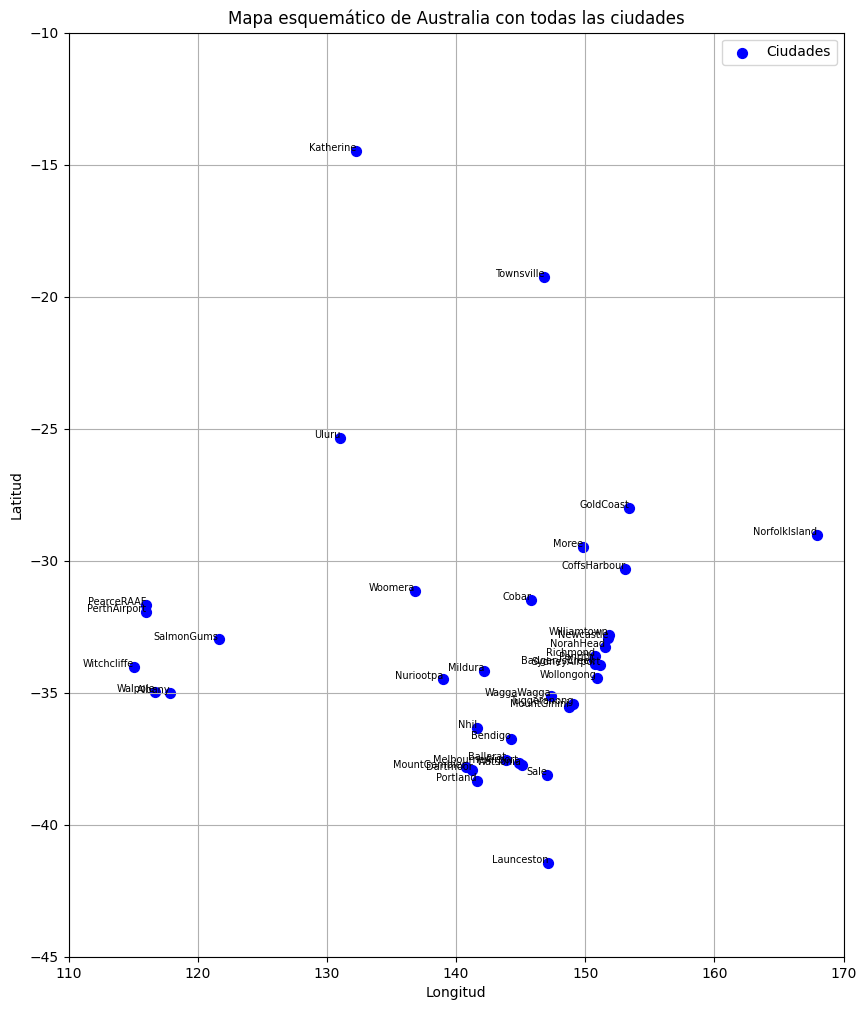

In [6]:
# Diccionario extendido con coordenadas aproximadas (algunas pueden ser estimadas)
city_coords = {
    'BadgerysCreek': (-33.92, 150.78),
    'Cobar': (-31.50, 145.83),
    'CoffsHarbour': (-30.30, 153.11),
    'Moree': (-29.47, 149.84),
    'Newcastle': (-32.93, 151.78),
    'NorahHead': (-33.28, 151.57),
    'NorfolkIsland': (-29.04, 167.95),
    'Penrith': (-33.75, 150.69),
    'Richmond': (-33.60, 150.75),
    'SydneyAirport': (-33.94, 151.18),
    'WaggaWagga': (-35.11, 147.37),
    'Williamtown': (-32.80, 151.84),
    'Wollongong': (-34.43, 150.89),
    'Tuggeranong': (-35.42, 149.07),
    'MountGinini': (-35.53, 148.77),
    'Ballarat': (-37.56, 143.85),
    'Bendigo': (-36.76, 144.28),
    'Sale': (-38.11, 147.07),
    'MelbourneAirport': (-37.67, 144.84),
    'Mildura': (-34.19, 142.16),
    'Nhil': (-36.33, 141.65),
    'Portland': (-38.34, 141.60),
    'Watsonia': (-37.72, 145.08),
    'Dartmoor': (-37.92, 141.27),
    'GoldCoast': (-28.00, 153.43),
    'Townsville': (-19.26, 146.82),
    'MountGambier': (-37.83, 140.78),
    'Nuriootpa': (-34.47, 138.99),
    'Woomera': (-31.15, 136.80),
    'Albany': (-35.02, 117.88),
    'Witchcliffe': (-34.01, 115.10),
    'PearceRAAF': (-31.67, 116.02),
    'PerthAirport': (-31.94, 115.97),
    'SalmonGums': (-32.98, 121.63),
    'Walpole': (-34.98, 116.73),
    'Launceston': (-41.44, 147.14),
    'Katherine': (-14.47, 132.26),
    'Uluru': (-25.34, 131.03)
}

plt.figure(figsize=(10, 12))
plt.scatter(
    [lon for lat, lon in city_coords.values()],
    [lat for lat, lon in city_coords.values()],
    s=50, c='blue', label='Ciudades'
)
for city, (lat, lon) in city_coords.items():
    plt.text(lon, lat, city, fontsize=7, ha='right')

plt.title('Mapa esquemático de Australia con todas las ciudades')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.xlim(110, 170)
plt.ylim(-45, -10)
plt.grid(True)
plt.legend()
plt.show()

##### Agrupamos por ciudades

In [7]:
region_dict = {
    'New South Wales': [
        'Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
        'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
        'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown', 'Wollongong'
    ],
    'Australian Capital Territory': [
        'Canberra', 'Tuggeranong', 'MountGinini'
    ],
    'Victoria': [
        'Ballarat', 'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne',
        'Mildura', 'Nhil', 'Portland', 'Watsonia', 'Dartmoor'
    ],
    'Queensland': [
        'Brisbane', 'Cairns', 'GoldCoast', 'Townsville'
    ],
    'South Australia': [
        'Adelaide', 'MountGambier', 'Nuriootpa', 'Woomera'
    ],
    'Western Australia': [
        'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport', 'Perth',
        'SalmonGums', 'Walpole'
    ],
    'Tasmania': [
        'Hobart', 'Launceston'
    ],
    'Northern Territory': [
        'AliceSprings', 'Darwin', 'Katherine', 'Uluru'
    ]
}

def asignar_region(ciudad):
    for region, ciudades in region_dict.items():
        if ciudad in ciudades:
            return region
    return 'Other'

pronostico['Region'] = pronostico['Location'].apply(asignar_region)

## Analisis descriptivo

In [8]:
# Verificamos que no haya nulos en la columna RainTomorrow.
pronostico["RainTomorrow"].isna().sum()

np.int64(3267)

In [9]:
#Eliminamos los nulos
pronostico = pronostico.dropna(subset=["RainTomorrow"])

### Division del dataset

In [10]:
X = pronostico.drop(labels =['Date','RainTomorrow'], axis = 1)
y = pronostico['RainTomorrow']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)